In [1]:
import pandas as pd

file_path = r"C:\Users\HR\Desktop\Workspace\Îç∞Ïù¥ÌÑ∞ÌÜ§\ÎßàÏºÄÌåÖ\merged_data.csv"
df = pd.read_csv(file_path)

print(df.head())

                  event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00+00:00       cart     5773203  1487580005134238553   
1  2019-10-01 00:00:03+00:00       cart     5773353  1487580005134238553   
2  2019-10-01 00:00:07+00:00       cart     5881589  2151191071051219817   
3  2019-10-01 00:00:07+00:00       cart     5723490  1487580005134238553   
4  2019-10-01 00:00:15+00:00       cart     5881449  1487580013522845895   

    brand  price    user_id                          user_session  \
0  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
1  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
2  lovely  13.48  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9   
3  runail   2.62  463240011  26dd6e6e-4dac-4778-8d2c-92e149dab885   
4  lovely   0.56  429681830  49e8d843-adf3-428b-a2c3-fe8bc6a307c9   

           event_time_moscow  event_month  \
0  2019-10-01 03:00:00+03:00         10.0   
1  2019-10-01 03:00:03+03:00         1

In [2]:
 import pandas as pd

# CSV ÎòêÎäî Parquet ÌååÏùºÏùÑ Î∂àÎü¨Ïò® Îí§ dfÏóê Ï†ÄÏû•ÌñàÎã§Í≥† Í∞ÄÏ†ï
# Ïòà: df = pd.read_csv('your_file.csv') ÎòêÎäî pd.read_parquet('your_file.parquet')

#  1. priceÍ∞Ä 0Ïù∏ Ìñâ Ï†úÍ±∞
df = df[df['price'] > 0]

#  2. brand Ïª¨ÎüºÏóêÏÑú Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df = df.dropna(subset=['brand'])

# Í≤∞Í≥º ÌôïÏù∏ (ÏÑ†ÌÉùÏÇ¨Ìï≠)
print(df.shape)
print(df['price'].min())
print(df['brand'].isnull().sum())

(11932733, 11)
0.06
0


C:\Users\HR\AppData\Local\Temp\ipykernel_26708\867683892.py:24: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_purchase['event_month'] = df_purchase['event_time_moscow'].dt.to_period('M').astype(str)


‚úÖ Ïùº/Ï£º/ÏõîÎ≥Ñ Îß§Ï∂ú CSV Ï†ÄÏû• ÏôÑÎ£å (utf-8-sig Ïù∏ÏΩîÎî©)!


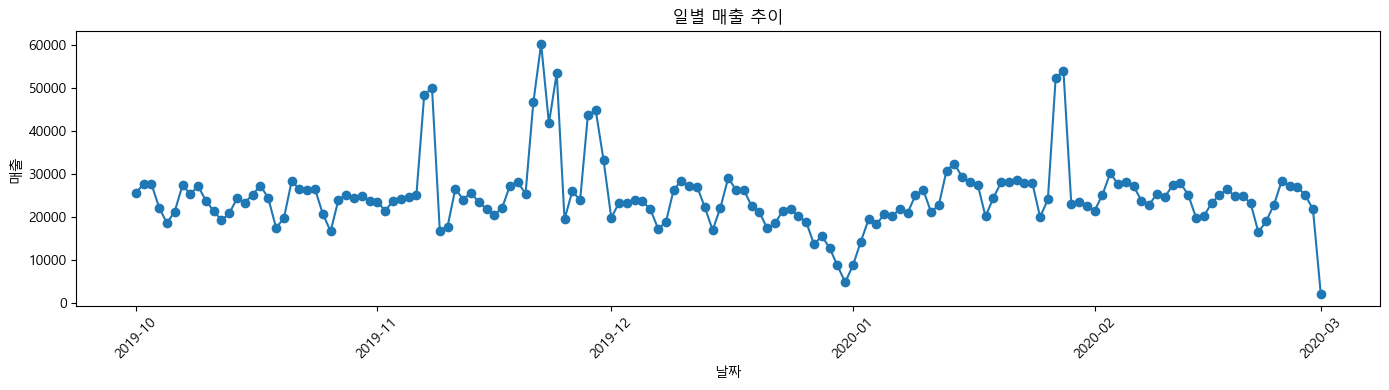

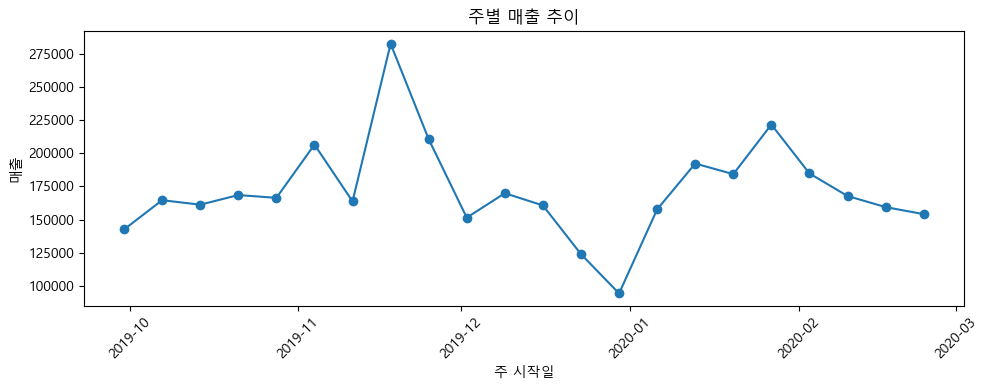

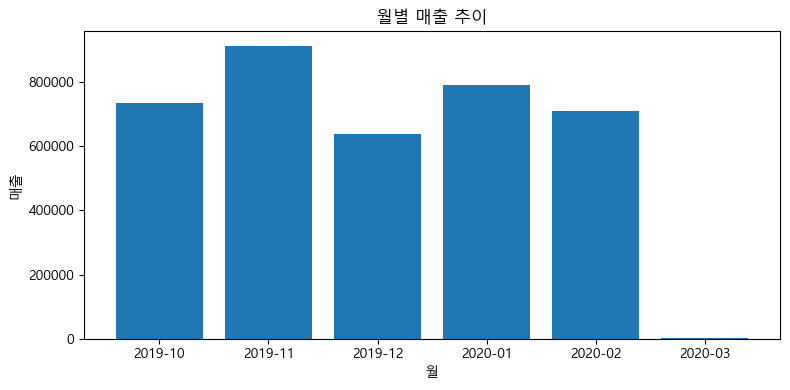

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux (Ïòà: Google Colab)
    plt.rc('font', family='NanumGothic')

# ‚úÖ ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False


# 1. purchase Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. ÎÇ†Ïßú Î≥ÄÌôò + ÌÉÄÏûÑÏ°¥ Ï†úÍ±∞
df_purchase['event_time_moscow'] = pd.to_datetime(df_purchase['event_time_moscow'])
df_purchase['event_date'] = df_purchase['event_time_moscow'].dt.tz_localize(None).dt.date
df_purchase['event_week'] = df_purchase['event_time_moscow'].dt.tz_localize(None).dt.to_period('W').apply(lambda r: r.start_time)
df_purchase['event_month'] = df_purchase['event_time_moscow'].dt.to_period('M').astype(str)

# 3. Ïùº/Ï£º/ÏõîÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
daily_sales = df_purchase.groupby('event_date')['price'].sum().reset_index().rename(columns={'price': 'ÏùºÎ≥Ñ_Îß§Ï∂ú'})
weekly_sales = df_purchase.groupby('event_week')['price'].sum().reset_index().rename(columns={'price': 'Ï£ºÎ≥Ñ_Îß§Ï∂ú'})
monthly_sales = df_purchase.groupby('event_month')['price'].sum().reset_index().rename(columns={'price': 'ÏõîÎ≥Ñ_Îß§Ï∂ú'})

# 4. CSV Ï†ÄÏû• (ÌïúÍ∏Ä Ïïà Íπ®ÏßÄÍ≤å)
daily_sales.to_csv('daily_sales.csv', index=False, encoding='utf-8-sig')
weekly_sales.to_csv('weekly_sales.csv', index=False, encoding='utf-8-sig')
monthly_sales.to_csv('monthly_sales.csv', index=False, encoding='utf-8-sig')

print("‚úÖ Ïùº/Ï£º/ÏõîÎ≥Ñ Îß§Ï∂ú CSV Ï†ÄÏû• ÏôÑÎ£å (utf-8-sig Ïù∏ÏΩîÎî©)!")

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 4))
plt.plot(daily_sales['event_date'], daily_sales['ÏùºÎ≥Ñ_Îß§Ï∂ú'], marker='o')
plt.title('ÏùºÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Îß§Ï∂ú')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(weekly_sales['event_week'], weekly_sales['Ï£ºÎ≥Ñ_Îß§Ï∂ú'], marker='o')
plt.title('Ï£ºÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥')
plt.xlabel('Ï£º ÏãúÏûëÏùº')
plt.ylabel('Îß§Ï∂ú')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(monthly_sales['event_month'], monthly_sales['ÏõîÎ≥Ñ_Îß§Ï∂ú'])
plt.title('ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥')
plt.xlabel('Ïõî')
plt.ylabel('Îß§Ï∂ú')
plt.tight_layout()
plt.show()


‚úÖ ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Ïàò CSV Ï†ÄÏû• ÏôÑÎ£å!


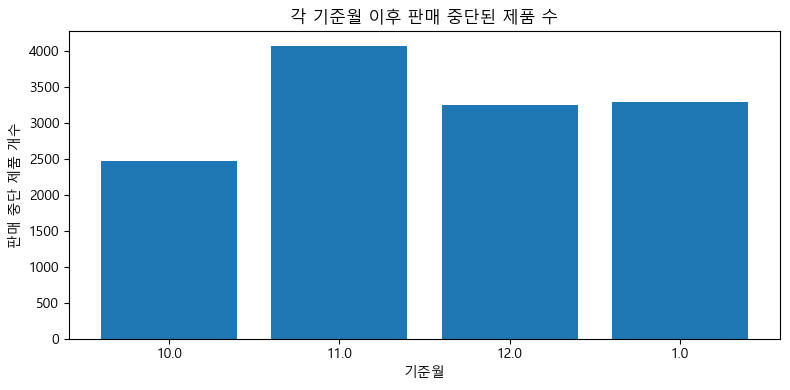

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ 1. Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
purchase_df = df[df['event_type'] == 'purchase'].copy()

# ‚úÖ 2. ÏõîÎ≥Ñ product_id Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
month_product = purchase_df.groupby('event_month')['product_id'].unique().to_dict()

# ‚úÖ 3. Ïõî ÏàúÏÑú ÏßÅÏ†ë ÏßÄÏ†ï (10ÏõîÎ∂ÄÌÑ∞ 2ÏõîÍπåÏßÄ)
month_order = [10.0, 11.0, 12.0, 1.0, 2.0]
month_product = {m: month_product[m] for m in month_order if m in month_product}
months = list(month_product.keys())

# ‚úÖ 4. Í∏∞Ï§ÄÏõîÎ≥Ñ ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Ïàò Í≥ÑÏÇ∞
stop_data = []
for i in range(len(months) - 1):  # ÎßàÏßÄÎßâ Îã¨ÏùÄ ÎπÑÍµê Î∂àÍ∞Ä
    curr_month = months[i]
    next_month = months[i + 1]

    curr_products = set(month_product[curr_month])
    next_products = set(month_product[next_month])

    stopped_products = curr_products - next_products

    stop_data.append({
        'event_month': curr_month,  # Í∏∞Ï§ÄÏõî
        'stopped_product_count': len(stopped_products)
    })

# ‚úÖ 5. DataFrameÏúºÎ°ú Ï†ïÎ¶¨
stop_df = pd.DataFrame(stop_data)

# ‚úÖ 6. Ïõî ÏàúÏÑú Î™ÖÏãú & Ï†ïÎ†¨
stop_df['event_month'] = pd.Categorical(stop_df['event_month'], categories=month_order, ordered=True)
stop_df = stop_df.sort_values('event_month')

# ‚úÖ 7. CSV Ï†ÄÏû•
stop_df.to_csv('stopped_products_per_month.csv', index=False, encoding='utf-8-sig')
print("‚úÖ ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Ïàò CSV Ï†ÄÏû• ÏôÑÎ£å!")

# ‚úÖ 8. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 4))
plt.bar(stop_df['event_month'].astype(str), stop_df['stopped_product_count'])
plt.title('Í∞Å Í∏∞Ï§ÄÏõî Ïù¥ÌõÑ ÌåêÎß§ Ï§ëÎã®Îêú Ï†úÌíà Ïàò')
plt.xlabel('Í∏∞Ï§ÄÏõî')
plt.ylabel('ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Í∞úÏàò')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# 1. Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. ÏõîÎ≥Ñ Î∏åÎûúÎìúÎ≥Ñ ÌåêÎß§ Ï†úÌíà Î™©Î°ù ÎßåÎì§Í∏∞
month_brand_product = purchase_df.groupby(['event_month', 'brand'])['product_id'].unique()

# 3. Ïõî ÏàúÏÑú ÏßÄÏ†ï
month_order = [10.0, 11.0, 12.0, 1.0, 2.0]
stop_data = []

# 4. Í∏∞Ï§ÄÏõîÎ≥Ñ Î∏åÎûúÎìúÎ≥Ñ ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Í≥ÑÏÇ∞
for i in range(len(month_order) - 1):  # ÎßàÏßÄÎßâ Îã¨ÏùÄ ÎπÑÍµê Î∂àÍ∞Ä
    curr_month = month_order[i]
    next_month = month_order[i + 1]

    curr_data = month_brand_product[curr_month] if curr_month in month_brand_product.index.levels[0] else pd.Series()
    next_data = month_brand_product[next_month] if next_month in month_brand_product.index.levels[0] else pd.Series()

    curr_brands = curr_data.index.get_level_values('brand').unique()

    for brand in curr_brands:
        curr_products = set(curr_data.get(brand, []))
        next_products = set(next_data.get(brand, []))

        stopped_products = curr_products - next_products

        stop_data.append({
            'event_month': curr_month,
            'brand': brand,
            'stopped_product_count': len(stopped_products)
        })

# 5. DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
brand_stop_df = pd.DataFrame(stop_data)
brand_stop_df['event_month'] = pd.Categorical(brand_stop_df['event_month'], categories=month_order, ordered=True)
brand_stop_df = brand_stop_df.sort_values(['event_month', 'stopped_product_count'], ascending=[True, False])

# 6. Ï†ÄÏû•
brand_stop_df.to_csv('brand_stopped_products_per_month.csv', index=False, encoding='utf-8-sig')
print("‚úÖ Î∏åÎûúÎìúÎ≥Ñ ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Ïàò CSV Ï†ÄÏû• ÏôÑÎ£å!")

# 7. ÎØ∏Î¶¨Î≥¥Í∏∞ (Í∞Å Ïõî ÏÉÅÏúÑ 5Í∞ú Î∏åÎûúÎìú Ï∂úÎ†•)
print("üìâ ÏõîÎ≥Ñ Î∏åÎûúÎìú ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Ïàò ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(brand_stop_df.groupby('event_month').head(5))


‚úÖ Î∏åÎûúÎìúÎ≥Ñ ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Ïàò CSV Ï†ÄÏû• ÏôÑÎ£å!
üìâ ÏõîÎ≥Ñ Î∏åÎûúÎìú ÌåêÎß§ Ï§ëÎã® Ï†úÌíà Ïàò ÎØ∏Î¶¨Î≥¥Í∏∞:
    event_month      brand  stopped_product_count
160        10.0       pole                    173
132        10.0     masura                    133
20         10.0    bluesky                    108
200        10.0     uskusi                    107
28         10.0        cnd                    101
413        11.0     uskusi                    237
333        11.0    lianail                    180
344        11.0     masura                    179
281        11.0  freedecor                    174
363        11.0       oniq                    155
595        12.0       pole                    209
563        12.0     masura                    141
492        12.0      estel                    135
520        12.0      irisk                    129
635        12.0     uskusi                    117
791         1.0     masura                    250
679         1.0        cnd  

C:\Users\HR\AppData\Local\Temp\ipykernel_26708\935691334.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(brand_stop_df.groupby('event_month').head(5))


‚úÖ Î∏åÎûúÎìú ÏõîÎ≥Ñ Îß§Ï∂ú CSV Ï†ÄÏû• ÏôÑÎ£å!


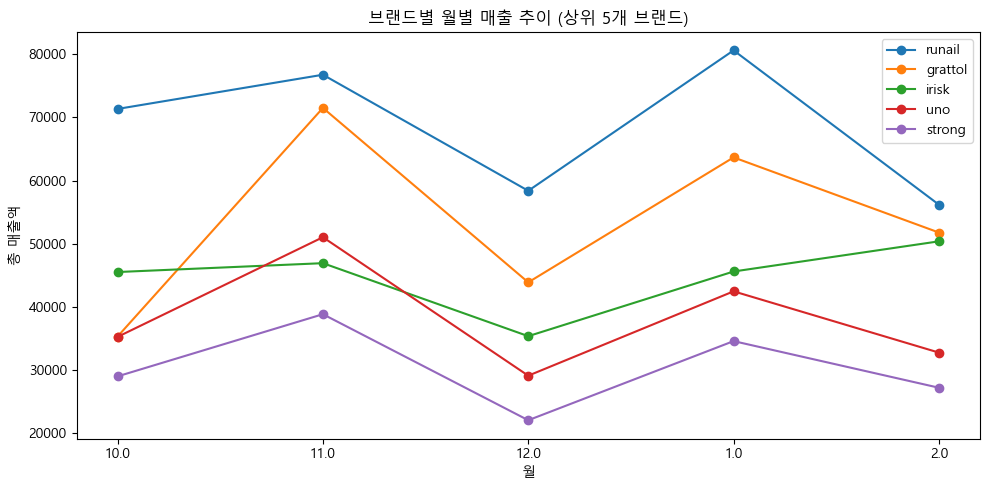

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ 1. Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
purchase_df = df[df['event_type'] == 'purchase'].copy()

# ‚úÖ 2. Î∏åÎûúÎìú Í∏∞Î∞ò ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú ÏßëÍ≥Ñ
brand_month_sales = purchase_df.groupby(['event_month', 'brand'])['price'].sum().reset_index()
brand_month_sales.rename(columns={'price': 'total_sales'}, inplace=True)

# ‚úÖ 3. Ïõî ÏàúÏÑú ÏßÄÏ†ï (10Ïõî~2Ïõî)
month_order = [10.0, 11.0, 12.0, 1.0, 2.0]
brand_month_sales['event_month'] = pd.Categorical(brand_month_sales['event_month'],
                                                  categories=month_order,
                                                  ordered=True)
brand_month_sales = brand_month_sales.sort_values(['event_month', 'total_sales'], ascending=[True, False])

# ‚úÖ 4. CSV Ï†ÄÏû•
brand_month_sales.to_csv('brand_monthly_sales.csv', index=False, encoding='utf-8-sig')
print("‚úÖ Î∏åÎûúÎìú ÏõîÎ≥Ñ Îß§Ï∂ú CSV Ï†ÄÏû• ÏôÑÎ£å!")

# ‚úÖ 5. ÏãúÍ∞ÅÌôî: Î∏åÎûúÎìúÎ≥Ñ Îß§Ï∂ú Î≥ÄÌôî Ï∂îÏù¥ (ÏÉÅÏúÑ 5Í∞ú Î∏åÎûúÎìú Í∏∞Ï§Ä ÏòàÏãú)
top_brands = brand_month_sales.groupby('brand')['total_sales'].sum().sort_values(ascending=False).head(5).index
plot_df = brand_month_sales[brand_month_sales['brand'].isin(top_brands)]

plt.figure(figsize=(10, 5))
for brand in top_brands:
    data = plot_df[plot_df['brand'] == brand]
    plt.plot(data['event_month'].astype(str), data['total_sales'], marker='o', label=brand)

plt.title('Î∏åÎûúÎìúÎ≥Ñ ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥ (ÏÉÅÏúÑ 5Í∞ú Î∏åÎûúÎìú)')
plt.xlabel('Ïõî')
plt.ylabel('Ï¥ù Îß§Ï∂úÏï°')
plt.legend()
plt.tight_layout()
plt.show()


‚úÖ ÏöîÏùºÎ≥Ñ Îß§Ï∂ú CSV Ï†ÄÏû• ÏôÑÎ£å!


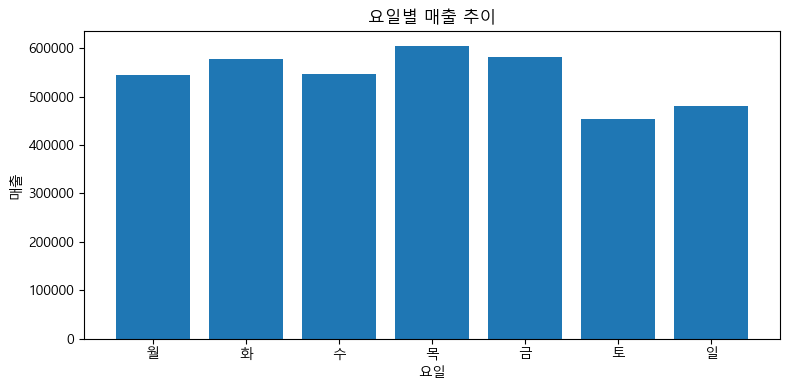

In [7]:
# 1. ÏöîÏùº Ï†ïÎ≥¥ Ï∂îÍ∞Ä (0=Ïõî, 6=Ïùº ‚Üí ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò)
df_purchase['event_dayofweek'] = pd.to_datetime(df_purchase['event_time_moscow']).dt.dayofweek
day_labels = ['Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†', 'Ïùº']
df_purchase['ÏöîÏùº'] = df_purchase['event_dayofweek'].apply(lambda x: day_labels[x])

# 2. ÏöîÏùºÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
weekday_sales = df_purchase.groupby('ÏöîÏùº')['price'].sum().reindex(day_labels).reset_index()
weekday_sales.rename(columns={'price': 'ÏöîÏùºÎ≥Ñ_Îß§Ï∂ú'}, inplace=True)

# 3. CSV Ï†ÄÏû•
weekday_sales.to_csv('weekday_sales.csv', index=False, encoding='utf-8-sig')
print("‚úÖ ÏöîÏùºÎ≥Ñ Îß§Ï∂ú CSV Ï†ÄÏû• ÏôÑÎ£å!")

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 4))
plt.bar(weekday_sales['ÏöîÏùº'], weekday_sales['ÏöîÏùºÎ≥Ñ_Îß§Ï∂ú'])
plt.title('ÏöîÏùºÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Îß§Ï∂ú')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ‚úÖ ÏöîÏùº ÎùºÎ≤®
day_labels = ['Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†', 'Ïùº']

# ‚úÖ ÏöîÏùº Ï†ïÎ≥¥ Ï∂îÍ∞Ä
df_purchase['event_dayofweek'] = pd.to_datetime(df_purchase['event_time_moscow']).dt.dayofweek
df_purchase['ÏöîÏùº'] = df_purchase['event_dayofweek'].apply(lambda x: day_labels[x])

# ‚úÖ Ïõî-ÏöîÏùºÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
month_weekday_sales = df_purchase.groupby(['event_month', 'ÏöîÏùº'])['price'].sum().reset_index()
month_weekday_sales.rename(columns={'price': 'Îß§Ï∂ú'}, inplace=True)

# ‚úÖ ÏöîÏùº Ï†ïÎ†¨ ÏàúÏÑú ÏßÄÏ†ï
month_weekday_sales['ÏöîÏùº'] = pd.Categorical(month_weekday_sales['ÏöîÏùº'], categories=day_labels, ordered=True)
month_weekday_sales = month_weekday_sales.sort_values(['event_month', 'ÏöîÏùº'])

# ‚úÖ CSV Ï†ÄÏû•
month_weekday_sales.to_csv('month_weekday_sales.csv', index=False, encoding='utf-8-sig')
print("‚úÖ ÏõîÎ≥Ñ ÏöîÏùºÎ≥Ñ Îß§Ï∂ú CSV Ï†ÄÏû• ÏôÑÎ£å!")

# ‚úÖ ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Íµ¨Ï°∞ ÌôïÏù∏ (Ïõî-Ìñâ, ÏöîÏùº-Ïó¥)
pivot_table = month_weekday_sales.pivot(index='event_month', columns='ÏöîÏùº', values='Îß§Ï∂ú')
print("\nüìä ÏõîÎ≥Ñ ÏöîÏùºÎ≥Ñ Îß§Ï∂ú ÌîºÎ≤ó ÌÖåÏù¥Î∏î:")
print(pivot_table)


‚úÖ ÏõîÎ≥Ñ ÏöîÏùºÎ≥Ñ Îß§Ï∂ú CSV Ï†ÄÏû• ÏôÑÎ£å!

üìä ÏõîÎ≥Ñ ÏöîÏùºÎ≥Ñ Îß§Ï∂ú ÌîºÎ≤ó ÌÖåÏù¥Î∏î:
ÏöîÏùº                   Ïõî          Ìôî          Ïàò          Î™©          Í∏à          ÌÜ†  \
event_month                                                                     
2019-10      104954.12  124869.35  130742.15  128623.65   88281.98   71633.62   
2019-11       97268.10  102537.92   99801.33  161861.02  200359.57  133377.55   
2019-12      108610.61  104257.94   97298.51   91680.34   78491.11   66809.53   
2020-01      131138.05  136086.31  110185.71  118533.79  123388.30   79306.25   
2020-02      102509.32  109539.64  107731.24  103912.03   91615.68  102377.00   
2020-03            NaN        NaN        NaN        NaN        NaN        NaN   

ÏöîÏùº                   Ïùº  
event_month             
2019-10       85433.89  
2019-11      116841.68  
2019-12       91626.79  
2020-01       91461.55  
2020-02       92589.03  
2020-03        2089.03  


C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

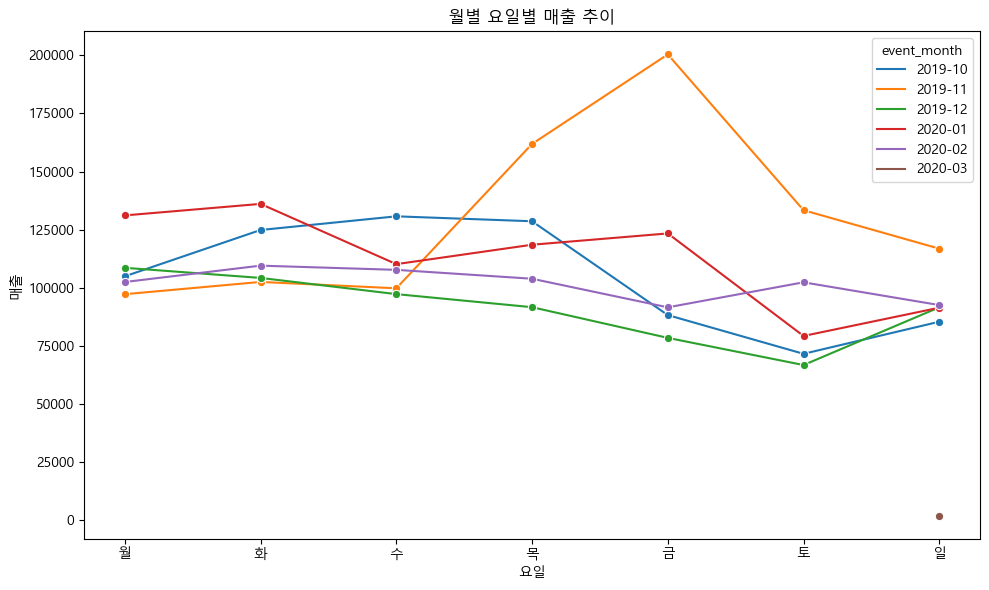

In [9]:
# ‚úÖ ÏõîÎ≥Ñ ÏöîÏùºÎ≥Ñ Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_weekday_sales, x='ÏöîÏùº', y='Îß§Ï∂ú', hue='event_month', marker='o')
plt.title('ÏõîÎ≥Ñ ÏöîÏùºÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥')
plt.ylabel('Îß§Ï∂ú')
plt.xlabel('ÏöîÏùº')
plt.tight_layout()
plt.show()
